In [2]:
#attendance Code: 9774

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

In [3]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Libraries for today's project
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Sprint Challenge Practice

- Can I import a CSV file into a DataFrame?
- Can I create a scatter plot?
- Can I split a DataFrame into a target vector and feature matrix?
- Can I split a dataset into a training set and a test set?
- Can I establish the baseline mean absolute error for a regression problem?
- Can I combine transformers with a predictor using a pipeline?
- Can I build a linear regresion model and a ridge regression model?
- Can I evaluate a model using common metrics like mean absolute error, root mean squared error, and R^2?
- If given a feature matrix, can I use my model to create a list of predictions?
- Can I create a horizontal bar chart with the coefficients from a linear model?

# Part 2: Pipelines and Plotting

Let's revise [our work from yesterday](https://tinyurl.com/yb9cz6n5).

# Part 3: Logistic Regression

# I. Wrangle Data

In [4]:
def wrangle(filepath):
  temp_df = pd.read_csv(filepath, index_col='PassengerId')
  temp_df.drop(columns = ['Name', 'Ticket', 'Cabin'], inplace=True)
  temp_df['Pclass'] = temp_df['Pclass'].astype('object')
  return temp_df



In [5]:
df = wrangle(DATA_PATH+'titanic/train.csv')
X_test = wrangle(DATA_PATH+'titanic/test.csv')

df.head()
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


## II. Split Data

In [7]:
# Split Target Vector from our Feature Matrix
target = 'Survived'

y = df[target]
X = df.drop(columns = target)


In [8]:
# Split our data into a TRAINING set and a VALIDATION set
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = .2, random_state = 42)


## III. Establish Baseline

In [9]:
df.head()

baseline_accuracy =  y_train.value_counts(normalize=True).max()

print('Baseline Accuracy Score: ', baseline_accuracy)

Baseline Accuracy Score:  0.6235955056179775


## IV. Build Model

- Why would regular linear regression not work here?

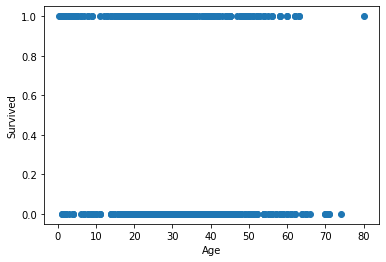

In [10]:
plt.scatter(df['Age'],df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

plt.show()

What we need for our model pipeline:

- `OneHotEncoder`
- `SimpleImputer`
- `LogisticRegression`

In [11]:
model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression()
)


model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Pclass', 'Sex', 'Embarked'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
    

## V. Check Metrics

In [12]:
print('Training Accuracy Score: ', model.score(X_train, y_train))

print('Validation Accuracy Score: ', model.score(X_val, y_val))

Training Accuracy Score:  0.8075842696629213
Validation Accuracy Score:  0.7988826815642458
